## EDA Pt. 2

The purpose of this notebook is to read back in the dataset I created in the EDA/Time Series Notebook, and conduct further EDA.

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('cleaned_games_dataset.csv', index_col='Unnamed: 0', parse_dates=['game_date'])

In [4]:
df.head()

,fg_1_1,fga_1_1,fg%_1_1,3p_1_1,3pa_1_1,3p%_1_1,ft_1_1,fta_1_1,ft%_1_1,orb_1_1,...,pts_2_3_opp,home_2_3_opp,betting_line_2_3_opp,off_rating_1_3_opp,off_rating_2_3_opp,over_under_3_opp,game_total_score_3_opp,days_1_back_opp,days_2_back_opp,days_3_back_opp
1,31,78,0.397,7,23,0.304,28,38,0.737,18,...,114,1,9.5,110.75,114.78,195.0,224,2,2,2
2,37,70,0.529,11,27,0.407,18,27,0.667,8,...,87,0,8.0,101.62,95.06,189.5,180,3,1,2
5,31,72,0.431,6,21,0.286,27,33,0.818,13,...,84,0,-3.5,94.13,87.86,188.0,174,1,3,1
6,30,71,0.423,8,21,0.381,34,42,0.810,16,...,102,1,-3.5,101.45,108.92,195.0,197,1,3,1
9,35,79,0.443,7,16,0.438,13,15,0.867,11,...,74,0,8.0,93.25,77.54,188.0,163,2,1,3


In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df[['bet_won_over', 'bet_won_under','game_total_score', 'off_rating_1_1', 
    'off_rating_1_1_opp', 'off_rating_2_1', 'home_1', 'home_2']].corr()

,bet_won_over,bet_won_under,game_total_score,off_rating_1_1,off_rating_1_1_opp,off_rating_2_1,home_1,home_2
bet_won_over,1.000000,-0.972633,0.677850,0.001458,0.001458,0.000296,0.000000,0.000000
bet_won_under,-0.972633,1.000000,-0.678123,-0.003411,-0.003411,-0.002594,0.000000,0.000000
game_total_score,0.677850,-0.678123,1.000000,0.092551,0.092551,0.075798,0.000000,0.000000
off_rating_1_1,0.001458,-0.003411,0.092551,1.000000,0.006939,0.186794,-0.001078,0.001078
off_rating_1_1_opp,0.001458,-0.003411,0.092551,0.006939,1.000000,0.031609,0.001078,-0.001078
off_rating_2_1,0.000296,-0.002594,0.075798,0.186794,0.031609,1.000000,-0.022116,0.022116
home_1,0.000000,0.000000,0.000000,-0.001078,0.001078,-0.022116,1.000000,-1.000000
home_2,0.000000,0.000000,0.000000,0.001078,-0.001078,0.022116,-1.000000,1.000000


#### Number of Overs

In [7]:
df['bet_won_over'].value_counts()

0    6042
1    5780
Name: bet_won_over, dtype: int64

In [8]:
'{:.1%}'.format(df['bet_won_over'].value_counts()[1]/len(df))

'48.9%'

#### Number of Unders

In [9]:
df['bet_won_under'].value_counts()

0    5944
1    5878
Name: bet_won_under, dtype: int64

In [10]:
'{:.1%}'.format(df['bet_won_under'].value_counts()[1]/len(df))

'49.7%'

#### Number of Pushes

Following cell is the # of pushes for the 5 seasons of NBA games I've collected, as well the % of games for which a push occurred.

In [11]:
print(len(df[df['bet_won_over'] == df['bet_won_under']]), '\n', 
      '{:.1%}'.format((len(df[df['bet_won_over'] == df['bet_won_under']])/len(df))))

164 
 1.4%


In [12]:
df['O_U_P'] = ['0' for x in df['bet_won_under']]

In [13]:
for i, row in enumerate(df['O_U_P']):
    if df.loc[i, 'bet_won_over'] == 1:
        df.loc[i, 'O_U_P'] = 'O'
    elif df.loc[i, 'bet_won_under'] == 1:
        df.loc[i, 'O_U_P'] = 'U'
    else:
        df.loc[i, 'O_U_P'] = 'P'

The below plot show the frequency of over/under/push outcomes for all 5 NBA seasons represented in my data.

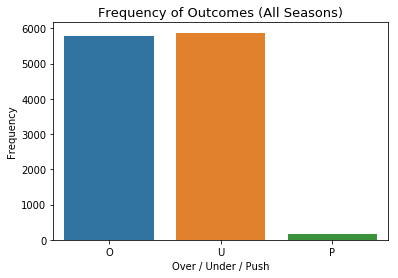

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='O_U_P', data=df)
plt.title("Frequency of Outcomes (All Seasons)", fontsize=13)
plt.xlabel('Over / Under / Push')
plt.ylabel('Frequency');

In [ ]:
df.of

In [22]:
df[['off_rating_1_1', 'off_rating_1_2', 'off_rating_1_3', 
    'off_rating_2_1', 'off_rating_2_2', 'off_rating_2_3',
    'game_total_score']].corr()

,off_rating_1_1,off_rating_1_2,off_rating_1_3,off_rating_2_1,off_rating_2_2,off_rating_2_3,game_total_score
off_rating_1_1,1.000000,0.125494,0.129859,0.186794,0.007532,0.004898,0.092551
off_rating_1_2,0.125494,1.000000,0.126091,0.005539,0.192003,0.010912,0.103820
off_rating_1_3,0.129859,0.126091,1.000000,0.008663,0.007839,0.190219,0.087787
off_rating_2_1,0.186794,0.005539,0.008663,1.000000,0.080027,0.073660,0.075798
off_rating_2_2,0.007532,0.192003,0.007839,0.080027,1.000000,0.081922,0.067281
off_rating_2_3,0.004898,0.010912,0.190219,0.073660,0.081922,1.000000,0.072955
game_total_score,0.092551,0.103820,0.087787,0.075798,0.067281,0.072955,1.000000


In [18]:
df[['off_rating_1_2', 'off_rating_1_2_opp', 
    'off_rating_2_2', 'off_rating_2_2_opp', 
    'game_total_score', 'bet_won_over', 'bet_won_under']].corr()

,off_rating_1_2,off_rating_1_2_opp,off_rating_2_2,off_rating_2_2_opp,game_total_score,bet_won_over,bet_won_under
off_rating_1_2,1.000000,0.034497,0.192003,0.039913,0.103820,0.010349,-0.009068
off_rating_1_2_opp,0.034497,1.000000,0.039913,0.192003,0.103820,0.010349,-0.009068
off_rating_2_2,0.192003,0.039913,1.000000,0.013248,0.067281,-0.004964,0.007440
off_rating_2_2_opp,0.039913,0.192003,0.013248,1.000000,0.067281,-0.004964,0.007440
game_total_score,0.103820,0.103820,0.067281,0.067281,1.000000,0.677850,-0.678123
bet_won_over,0.010349,0.010349,-0.004964,-0.004964,0.677850,1.000000,-0.972633
bet_won_under,-0.009068,-0.009068,0.007440,0.007440,-0.678123,-0.972633,1.000000


In [19]:
df[['off_rating_1_3', 'off_rating_1_3_opp', 
    'off_rating_2_3', 'off_rating_2_3_opp', 
    'game_total_score', 'bet_won_over', 'bet_won_under']].corr()

,off_rating_1_3,off_rating_1_3_opp,off_rating_2_3,off_rating_2_3_opp,game_total_score,bet_won_over,bet_won_under
off_rating_1_3,1.000000,0.037897,0.190219,0.025411,0.087787,0.006248,-0.003866
off_rating_1_3_opp,0.037897,1.000000,0.025411,0.190219,0.087787,0.006248,-0.003866
off_rating_2_3,0.190219,0.025411,1.000000,0.017488,0.072955,-0.000174,0.000739
off_rating_2_3_opp,0.025411,0.190219,0.017488,1.000000,0.072955,-0.000174,0.000739
game_total_score,0.087787,0.087787,0.072955,0.072955,1.000000,0.677850,-0.678123
bet_won_over,0.006248,0.006248,-0.000174,-0.000174,0.677850,1.000000,-0.972633
bet_won_under,-0.003866,-0.003866,0.000739,0.000739,-0.678123,-0.972633,1.000000


In [16]:
df[['fta_1_3', 'fta_1_3_opp', 'game_total_score']].corr()

,fta_1_3,fta_1_3_opp,game_total_score
fta_1_3,1.000000,0.038070,0.040002
fta_1_3_opp,0.038070,1.000000,0.040002
game_total_score,0.040002,0.040002,1.000000
